In [1]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.style.use('ggplot')
pd.options.display.float_format = '{:.5f}'.format

C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col='공고게시일자')

In [3]:
table = df.수요기관명.value_counts()

In [4]:
pd.DataFrame(table).head()

,수요기관명
방위사업청,62468
한국수자원공사,13366
서울특별시,11746
한국도로공사,9715
서울교통공사,8109


In [5]:
df.index = df.index.astype(str)

df.index = pd.to_datetime(df.index)

In [6]:
water_df = df[df.수요기관명 == "방위사업청"] # 용역
water_df_service = water_df[water_df.대상 == "물품"]

In [7]:
col_name = ["추정가격"]
water_service = pd.DataFrame(data = water_df_service,columns = col_name)

In [8]:
water_service['date'] = water_service.index
water_service.dtypes

water_service['date'] = water_service['date'].astype(str)

water_service['date'] = pd.to_datetime(water_service['date'])

water_groups = water_service.groupby(["date"]).추정가격.sum()
water_group_df = pd.DataFrame(data=water_groups, index = water_groups.index)

In [9]:
weekly_df = water_group_df.resample('1W').추정가격.sum() #fillna(0)
weekly_df_df=pd.DataFrame(weekly_df)

In [46]:
water_group_df_day = water_group_df
water_group_df_day_fin = water_group_df_day[water_group_df_day.추정가격!=0]
water_group_df_day_fin # 방위사업청 일자별로

,추정가격
date,
2017-01-24,154545455.00000
2017-02-02,154545455.00000
2017-02-10,154545455.00000
2017-02-16,403497818.00000
2017-02-23,154545455.00000
...,...
2021-09-07,996363636.00000
2021-10-07,996363636.00000
2021-11-18,1383627054.00000


<AxesSubplot:xlabel='date'>

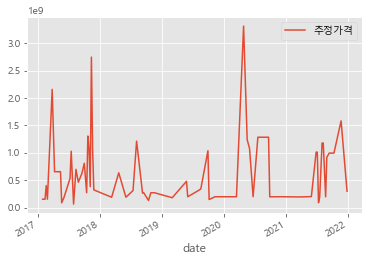

In [70]:
weekly_df_fin = weekly_df_df[weekly_df_df.추정가격 !=0]
weekly_df_fin.shape
weekly_df_fin.plot()

Text(0.5, 1.0, '방위사업청 물품 추정가격_day')

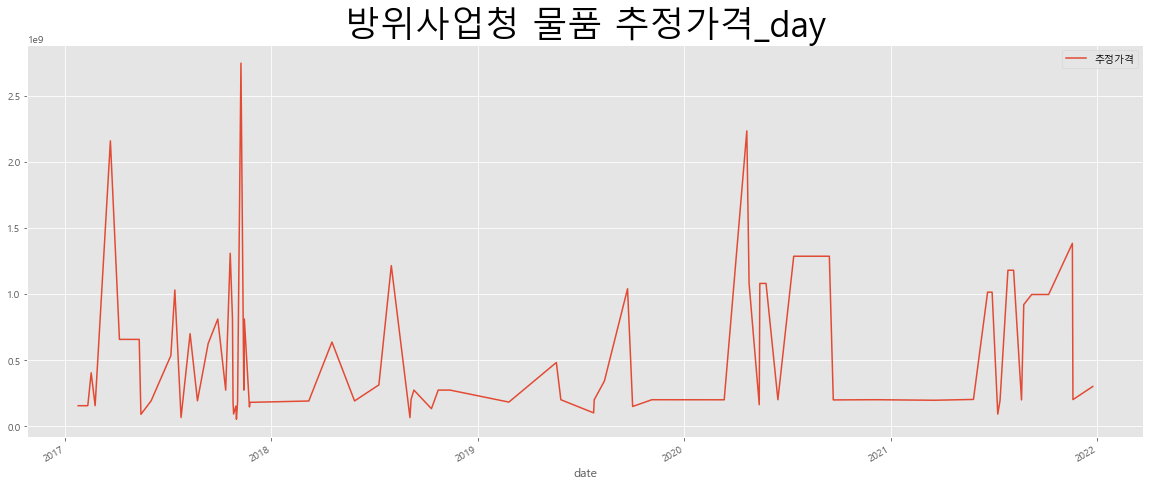

In [47]:
water_group_df_day_fin.plot(figsize=(20,8))
plt.title("방위사업청 물품 추정가격_day",fontsize=35)

In [48]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(water_group_df_day_fin[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -8.566103
p-value : 0.000000
Critical values:
	1%:-3.518
	5%:-2.900
	10%:-2.587


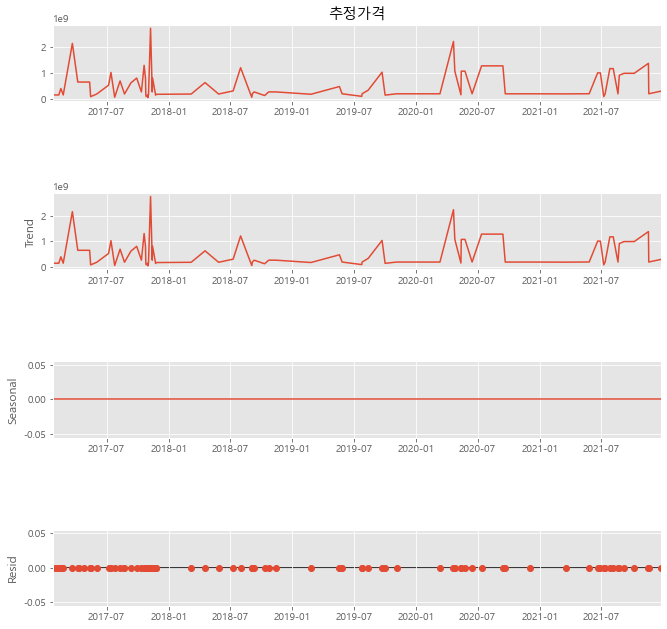

In [49]:
decomposition = sm.tsa.seasonal_decompose(water_group_df_day_fin['추정가격'],model='additive',period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()


# observed: 실제관측치에 대한 row data
# Trend
# Seasonal
# resi

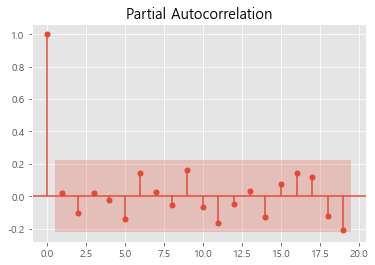

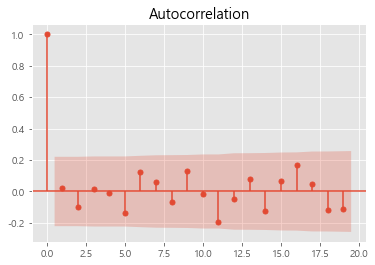

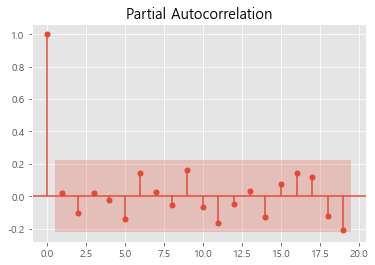

In [50]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(water_group_df_day_fin.추정가격)
plot_pacf(water_group_df_day_fin.추정가격)

<AxesSubplot:xlabel='date'>

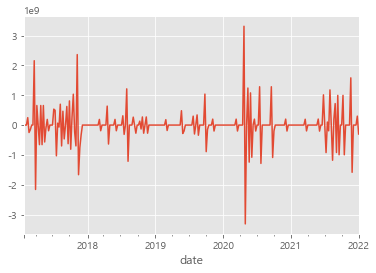

In [15]:
temple_sample = weekly_df
temple_sample.diff().plot()

<AxesSubplot:xlabel='date'>

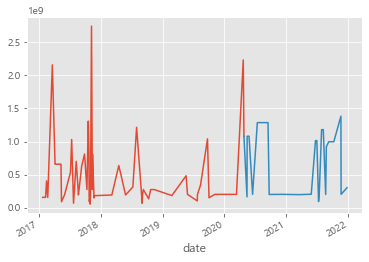

In [51]:
y_train = water_group_df_day_fin['추정가격'][:int(0.7*len(water_group_df_day_fin))+1]
y_test = water_group_df_day_fin['추정가격'][int(0.7*len(water_group_df_day_fin)):]
y_train.plot()
y_test.plot()

In [52]:
# 정규화 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

y_train_sc_temp = y_train.values.reshape(-1,1)

y_train_sc = sc.fit_transform(y_train_sc_temp)

y_test_sc_temp = y_test.values.reshape(-1,1)
y_test_sc = sc.fit_transform(y_test_sc_temp)

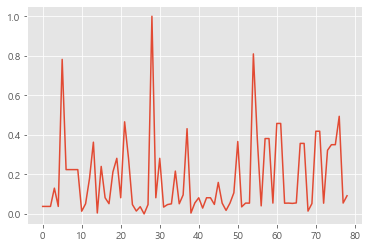

In [53]:
water_sample_minmax = sc.fit_transform(water_group_df_day_fin)
plt.plot(water_sample_minmax)

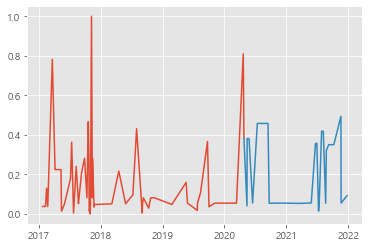

In [54]:
y_train_mm = water_sample_minmax[:int(0.7*len(water_sample_minmax))+1]
y_test_mm = water_sample_minmax[int(0.7*len(water_sample_minmax)):]
plt.plot(y_train.index,y_train_mm)
plt.plot(y_test.index, y_test_mm)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

kpss_diffs = ndiffs(y_train_mm, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train_mm, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [66]:
model = pm.auto_arima(y = y_train_mm        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , D = 0
                      , start_p = 0 
                      , max_p = 5   
                      , start_q = 0 
                      , max_q = 5   
                      #, m =        
                      , seasonal = True # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      #, trend = True
                      )
model.fit(y_train_mm)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24.429, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8.477, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22.454, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6.931, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6.215, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7.730, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=4.486, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5.169, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=6.014, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0

ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\yjhon\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


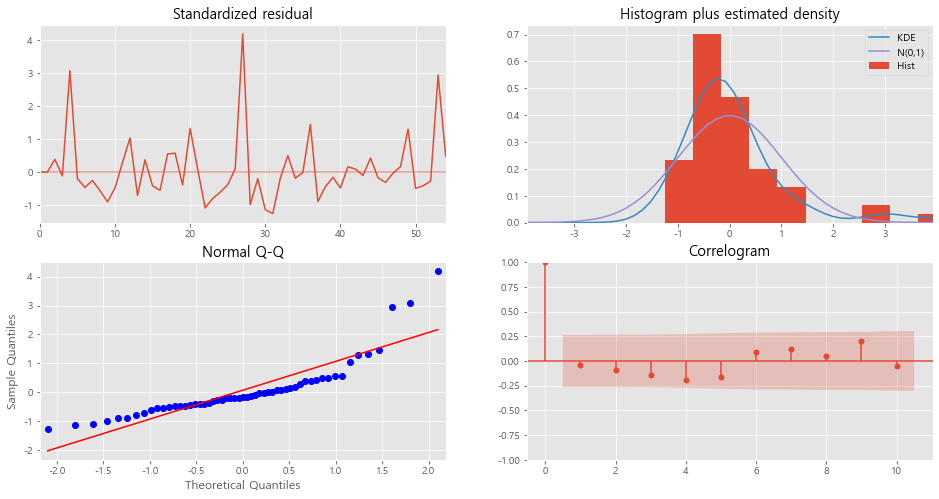

In [67]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

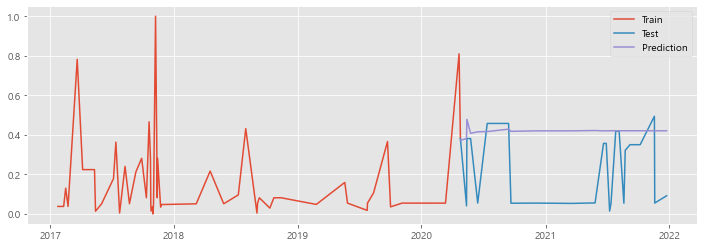

In [68]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test_mm)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train.index,y_train_mm, label='Train')        # 훈련 데이터
plt.plot(y_test.index,y_test_mm, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
y_index = y_test.index
y_test_temp_val = y_test_mm
y_pred_temp_val = y_predict
plt.figure(figsize=(10,3))
plt.plot(y_test.index,y_test_temp_val,label="test")
plt.plot(y_pred_temp_val,label="pred")
plt.legend()
plt.show()